Shortest Path: ['A', 'C', 'D', 'E']
Total Cost: 8.0


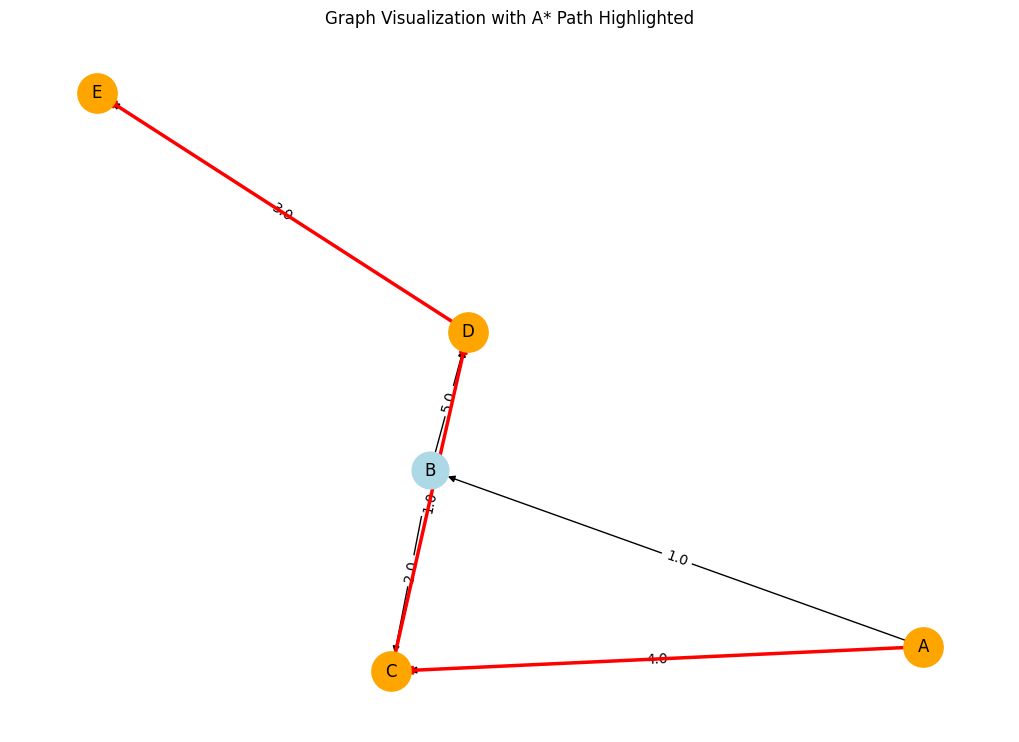

In [2]:
import csv
import heapq
from collections import defaultdict

# Read the directed weighted graph from CSV
def read_graph(file_path):
    graph = defaultdict(list)
    with open(file_path, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            src = row['source']
            dest = row['destination']
            weight = float(row['weight'])
            graph[src].append((dest, weight))  # directed edge
    return graph

# Read the heuristic values from CSV
def read_heuristics(file_path):
    heuristics = {}
    with open(file_path, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            node = row['node']
            heuristic = float(row['heuristic'])
            heuristics[node] = heuristic
    return heuristics

# A* Algorithm
def a_star(graph, heuristics, start, goal):
    open_set = []
    heapq.heappush(open_set, (heuristics[start], 0, start, [start]))  # (f, g, node, path)
    
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current == goal:
            return path, g

        if current in visited:
            continue
        visited.add(current)

        for neighbor, weight in graph[current]:
            if neighbor not in visited:
                new_g = g + weight
                new_f = new_g + heuristics.get(neighbor, float('inf'))
                heapq.heappush(open_set, (new_f, new_g, neighbor, path + [neighbor]))

    return None, float('inf')

# --- Main Program ---

# Load graph and heuristics
graph = read_graph('graph_with_heuristics.csv')
heuristics = read_heuristics('heuristics.csv')

# Define start and goal
start_node = 'A'
goal_node = 'E'

# Run A*
path, cost = a_star(graph, heuristics, start_node, goal_node)

# Output
print("Shortest Path:", path)
print("Total Cost:", cost)
